# Student Performance Indicator – ML Project

## Machine Learning Project Life Cycle
1. Understanding the Problem Statement  
2. Data Collection  
3. Data Validation & Checks  
4. Exploratory Data Analysis (EDA)  
5. Data Preprocessing  
6. Model Training  
7. Model Evaluation & Best Model Selection


### 1. Problem Statement

This project aims to understand how a student's academic performance is influenced by:
- Gender  
- Ethnicity  
- Parental Level of Education  
- Lunch and Test Preparation Course  
- Reading and Writing Scores

🎯 The goal is to **predict a student's final grade category** (e.g., A, B, C, etc.)  
based on these input features.

### 2. Data Collection

**Dataset Source**: [Kaggle – Student Performance Dataset](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)

**Rows:** 1000 
**Columns:** 8 (including scores and demographic details)


#### 2.1 Import data and Required Packages

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


**Import the CSV Data as Pandas DataFrame**

In [79]:
# Load the dataset
df = pd.read_csv("student_data1.csv")  

# Show first 5 rows
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Shape of the dataset**

In [80]:
# Dataset shape (rows, columns)
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

Dataset contains 1000 rows and 8 columns


#### 2.2 Dataset Information

Below is a description of each column in the dataset:

- **gender**: Sex of the student → (Male / Female)  
- **race/ethnicity**: Ethnic group of the student → (Group A, B, C, D, E)  
- **parental level of education**: parent's final education ->(bachelor's degree,some college,master's degree,associate's degree,high school) 
- **lunch**: having lunch before test (standard or free/reduced)
- **test preparation course**: complete or not complete before test
- **math score**
- **reading score**
- **writing score**

### 3. Data Checks to Perform

Before starting EDA, we'll validate the dataset by performing the following checks:

-  Check for missing values  
-  Check for duplicates  
-  Check data types  
-  Check the number of unique values in each column  
-  Check summary statistics of the dataset  
-  Check all possible categories in categorical columns


#### 3.1 Check Missing values

In [81]:
# Check for missing values in each column
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**There are no missing values in the data set**

#### 3.2 Check Duplicates

In [82]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

#### 3.3 Check data types

In [83]:
# Check data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Checking the number of unique values of each column

In [84]:
# Number of unique values in each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Check statistics of data set

In [85]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insight**

- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17


#### 3.6 Exploring Data

In [86]:
# Show first few rows of the dataset
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [87]:
# Display unique values for categorical columns
categorical_cols = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

for col in categorical_cols:
    print(f"Categories in '{col}': {df[col].unique()}")

Categories in 'gender': ['female' 'male']
Categories in 'race_ethnicity': ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch': ['standard' 'free/reduced']
Categories in 'test_preparation_course': ['none' 'completed']


In [88]:
# Identify numerical and categorical features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Print feature groups
print(f"We have {len(numeric_features)} numerical features: {numeric_features}")
print(f"We have {len(categorical_features)} categorical features: {categorical_features}")

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### 3.8 Adding columns for "Total Score" and "Average"

In [89]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [90]:
# Count of students with full marks
print("Students with Full Marks:")
print("Math:   ", df[df['math_score'] == 100]['average'].count())
print("Reading:", df[df['reading_score'] == 100]['average'].count())
print("Writing:", df[df['writing_score'] == 100]['average'].count())

Students with Full Marks:
Math:    7
Reading: 17
Writing: 14


In [91]:
# Count of students scoring less than or equal to 20
print("Students with less than equal to 20 Marks:")
print("Math:   ", df[df['math_score'] <= 20]['average'].count())
print("Reading:", df[df['reading_score'] <= 20]['average'].count())
print("Writing:", df[df['writing_score'] <= 20]['average'].count())


Students with less than equal to 20 Marks:
Math:    4
Reading: 1
Writing: 3


**Insights**
- From above values we get students have performed the worst in Maths
- Best performance is in reading section

### 4. Creating a Detailed Grade Column (Target Variable)

To more accurately reflect student performance, we define a refined grading system:

- A+: 95 and above  
- A:  90–94  
- B+: 85–89  
- B:  75–84  
- C+: 65–74  
- C:  50–64
- D:  40–49
- E:  33–39
- F:  Below 35  



In [92]:
def score_to_grade(avg):
    if avg >= 95:
        return 'A+'
    elif avg >= 90:
        return 'A'
    elif avg >= 85:
        return 'B+'
    elif avg >= 75:
        return 'B'
    elif avg >= 65:
        return 'C+'
    elif avg >= 50:
        return 'C'
    elif avg >= 40:
        return 'D'
    elif avg >= 33:
        return 'E'
    else:
        return 'F'

df['grade'] = df['average'].apply(score_to_grade)


In [93]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,C+
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,B
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,D
4,male,group C,some college,standard,none,76,78,75,229,76.333333,B


In [94]:
# Creating a new CSV file for our model training
df.to_csv("student_data_training.csv", index=False)

### 5. Data Visualization (With Grades)

#### 5.1 Grade Distribution Overview
This bar chart shows how students are distributed across each grade category


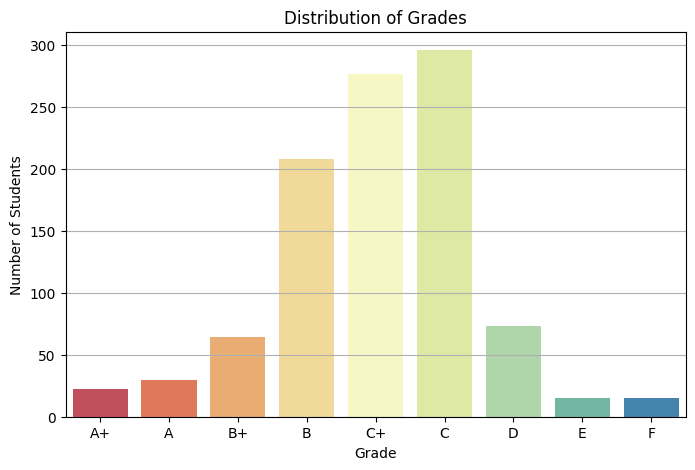

In [95]:
# Define academic grade order (highest to lowest)
grade_order = ['A+', 'A', 'B+', 'B', 'C+', 'C', 'D', 'E', 'F']

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='grade', order=grade_order, palette='Spectral')
plt.title('Distribution of Grades')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.grid(axis='y')
plt.show()



#### 5.2 Grade Distribution by Gender
This visualization compares how students of different genders are distributed across grades. 
It can highlight any performance gap or bias.


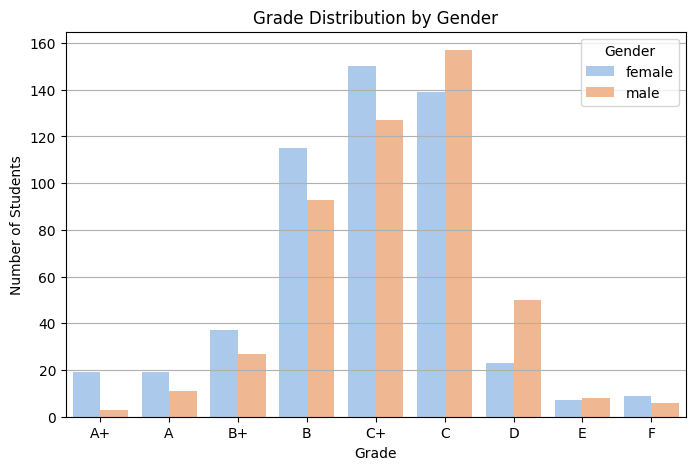

In [96]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='grade', hue='gender', order=grade_order, palette='pastel')
plt.title('Grade Distribution by Gender')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.legend(title='Gender')
plt.grid(axis='y')
plt.show()

**Insight:**  
- Female students dominate the higher grades (A+ and A), while male students are more frequent in lower grade bands
- This suggests better average performance by females in this dataset.


#### 5.3 Grade Distribution by Lunch Type
This chart explores the impact of lunch type (standard vs free/reduced) on student grades.


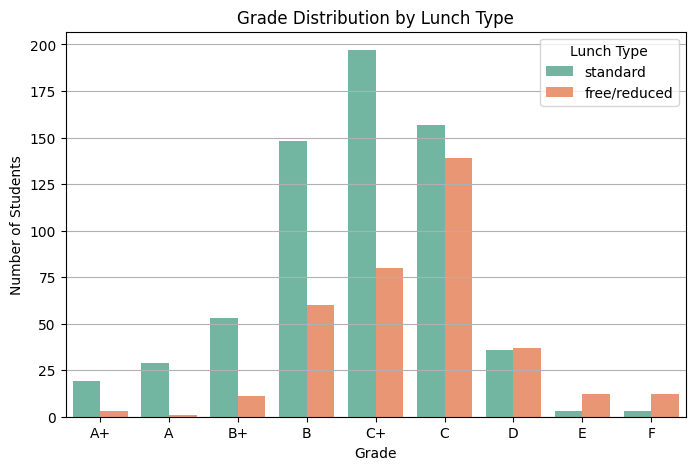

In [97]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='grade', hue='lunch', order=grade_order, palette='Set2')
plt.title('Grade Distribution by Lunch Type')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.legend(title='Lunch Type')
plt.grid(axis='y')
plt.show()


**Insight (Lunch vs Grade):**
- Students with **standard lunch** score more A+, A, and B+ grades.
- **Free/reduced lunch** students are more in lower grades (C, D, E, F).
- Suggests a link between **nutrition and academic performance**.


#### 5.4  Grade Distribution by Test Preparation Course

This plot shows how test preparation impacts student grades.


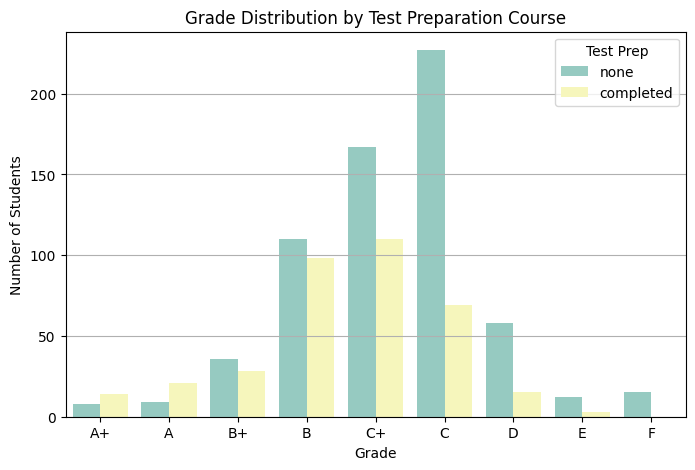

In [98]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='grade', hue='test_preparation_course', order=grade_order, palette='Set3')
plt.title('Grade Distribution by Test Preparation Course')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.legend(title='Test Prep')
plt.grid(axis='y')
plt.show()

**Insight:**
- Students who **completed** the test prep course scored more **A+, A, B+** grades.
- Students with **no preparation** are more distributed across **lower grades**.
- Indicates test prep can significantly **boost academic performance**.


#### 5.5 Grade vs Ethnicity Group

This chart shows how grades vary across different race/ethnicity groups.


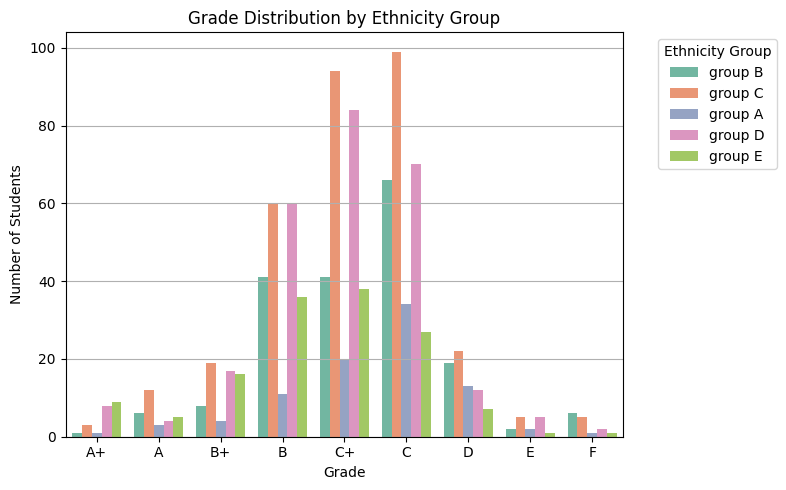

In [99]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='grade', hue='race_ethnicity', order=grade_order, palette='Set2')
plt.title('Grade Distribution by Ethnicity Group')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.legend(title='Ethnicity Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Insight (Ethnicity vs Grade):**
- Students from **Group E and D** tend to score more A+, A, and B+ grades.
- **Group A and B** show a wider spread across lower and mid-range grades.
- Indicates possible influence of background factors on performance.


#### 5.6 Grade vs Parental Level of Education
This chart shows how students' grades vary with their parents' education levels.


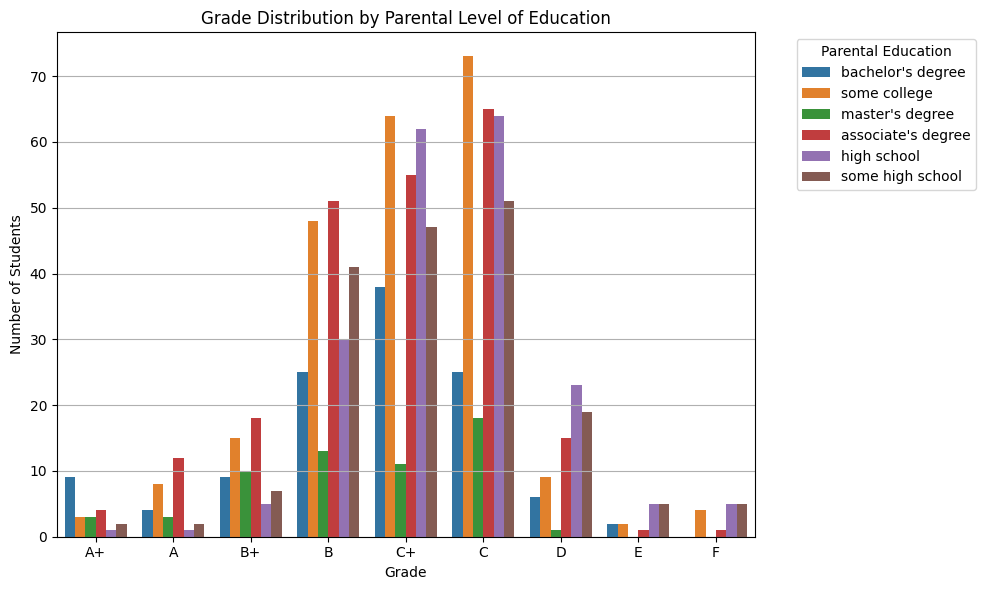

In [100]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='grade', hue='parental_level_of_education', order=grade_order, palette='tab10')
plt.title('Grade Distribution by Parental Level of Education')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.legend(title='Parental Education', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Insight:**
- Students whose parents have an **associate's or master's degree** are more frequently found in **top grades (A+, A, B+)**.
- Those with parents having only **high school or some high school education** tend to appear more in **lower grades (C, D, E)**.
- However, overall, the impact of **parental education on grades is moderate**, not strongly decisive.


#### 5.7 Correlation Heatmap
This heatmap shows how closely related the numerical features are to one another.


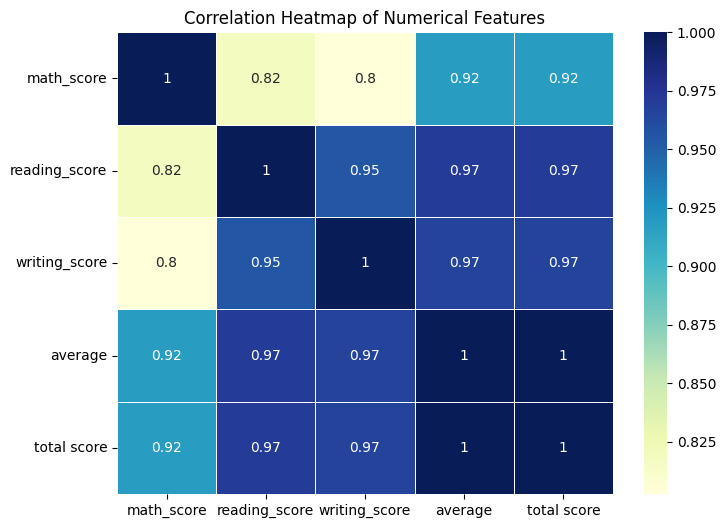

In [101]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['math_score', 'reading_score', 'writing_score', 'average', 'total score']].corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**Insight:**
- All three subject scores have strong positive correlations with each other.
- The **average** and **total** scores are highly correlated with individual subject scores — especially **reading** and **writing**.


### 6. Conclusion from EDA

- No missing or duplicate values were found in the dataset.
- Subject scores (math, reading, writing) are **strongly correlated** with each other.
- Students with **standard lunch** and those who **completed the test preparation course** tend to have **higher grades**.
- **Parental education** shows moderate impact — higher educated parents are slightly more associated with better-performing students.
- A new **`grade` column** was successfully created based on the **average score**, providing a categorical target for prediction.
- The data is clean and ready for preprocessing and model building.
